<a href="https://colab.research.google.com/github/beingwahid/beingwahid/blob/main/fakenews_one_hot1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!unzip gdrive/"My Drive"/train.zip


Archive:  gdrive/My Drive/train.zip
  inflating: train.csv               


In [8]:
data=pd.read_csv("train.csv")

In [9]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
data= data.dropna()

In [11]:
## Get the Independent Features

X=data.loc[:,["title","author","text"]]

In [12]:
## Get the Dependent features
y=data['label']

In [13]:
X.shape

(18285, 3)

In [14]:
y.shape

(18285,)

In [15]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN , Bidirectional , LSTM
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers

In [17]:
### Vocabulary size
voc_size=5000

In [18]:
messages=X.copy()

In [19]:
messages.reset_index(inplace=True)

In [20]:
import nltk
import re
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [22]:
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[501, 1737, 4800, 3076, 144, 2443, 400, 960, 1864, 1780],
 [2313, 3739, 3738, 2866, 542, 349, 4775],
 [4274, 2296, 4388, 3800],
 [3609, 4029, 2409, 2922, 193, 307],
 [917, 542, 2623, 3784, 4519, 4003, 542, 3096, 1915, 2941],
 [3470,
  715,
  235,
  1946,
  3580,
  1469,
  2753,
  2496,
  2218,
  2559,
  3047,
  4844,
  858,
  2944,
  4775],
 [3646, 2550, 1083, 1520, 4600, 2689, 1117, 2365, 3857, 324, 1229],
 [4929, 3576, 27, 1987, 2492, 3590, 1469, 3127, 3857, 324, 1229],
 [3067, 4925, 1535, 2186, 801, 1105, 4737, 1921, 1469, 1574],
 [4963, 1316, 3972, 3287, 616, 4687, 2063, 1360],
 [2490, 1562, 2138, 3055, 2797, 1354, 2450, 793, 2214, 3724, 1767],
 [2922, 2678, 144, 1105, 1469, 2492],
 [1417, 3420, 2849, 1022, 3796, 3199, 2230, 4628, 864],
 [3619, 4672, 980, 2274, 1538, 2775, 1240, 3857, 324, 1229],
 [135, 168, 3257, 3744, 2248, 3857, 324, 1229],
 [4281, 2501, 1490, 148, 411, 4917, 1918, 1547, 4855, 1563],
 [2270, 181, 3739],
 [4866, 816, 642, 3197, 1469, 163, 352, 4775],
 [3008, 202

In [23]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  960 1864 1780]
 [   0    0    0 ...  542  349 4775]
 [   0    0    0 ... 2296 4388 3800]
 ...
 [   0    0    0 ... 3857  324 1229]
 [   0    0    0 ...  926 3397 2330]
 [   0    0    0 ...  440 3589 2928]]


In [24]:
## Creating RNN model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(SimpleRNN(128,kernel_regularizer=regularizers.l2(0.001)))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               21632     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 229,953
Trainable params: 229,953
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
len(embedded_docs),y.shape

(18285, (18285,))

In [26]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [27]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [29]:
### Finally Training
a=model1.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64)

Epoch 1/10
173/173 [==============================] - 5s 17ms/step - loss: 0.7254 - accuracy: 0.6877 - val_loss: 0.5960 - val_accuracy: 0.7878
Epoch 2/10
173/173 [==============================] - 3s 16ms/step - loss: 0.5367 - accuracy: 0.8190 - val_loss: 0.4653 - val_accuracy: 0.8735
Epoch 3/10
173/173 [==============================] - 3s 16ms/step - loss: 0.4084 - accuracy: 0.8953 - val_loss: 0.3640 - val_accuracy: 0.9102
Epoch 4/10
173/173 [==============================] - 3s 16ms/step - loss: 0.3223 - accuracy: 0.9298 - val_loss: 0.3245 - val_accuracy: 0.9167
Epoch 5/10
173/173 [==============================] - 3s 16ms/step - loss: 0.2691 - accuracy: 0.9489 - val_loss: 0.3299 - val_accuracy: 0.9200
Epoch 6/10
173/173 [==============================] - 3s 15ms/step - loss: 0.2304 - accuracy: 0.9613 - val_loss: 0.2986 - val_accuracy: 0.9249
Epoch 7/10
173/173 [==============================] - 3s 16ms/step - loss: 0.2011 - accuracy: 0.9730 - val_loss: 0.2897 - val_accuracy: 0.9290

In [30]:
rnn_pred=(model1.predict(X_test)>0.5).astype("int32")

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rnn_pred)

array([[3176,  243],
       [ 314, 2302]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rnn_pred)

0.907705053852527

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rnn_pred,target_names=["real","fake"]))

              precision    recall  f1-score   support

        real       0.91      0.93      0.92      3419
        fake       0.90      0.88      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.90      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [34]:
a.history

{'accuracy': [0.6877097487449646,
  0.8190476298332214,
  0.8953288197517395,
  0.9297959208488464,
  0.9489342570304871,
  0.9612698554992676,
  0.9729705452919006,
  0.9826757311820984,
  0.9863038659095764,
  0.9920181632041931],
 'loss': [0.7253739833831787,
  0.5366592407226562,
  0.40839773416519165,
  0.32228708267211914,
  0.2691354751586914,
  0.23038478195667267,
  0.20114576816558838,
  0.17428384721279144,
  0.1584581881761551,
  0.141048401594162],
 'val_accuracy': [0.7877551317214966,
  0.8734694123268127,
  0.9102040529251099,
  0.9167346954345703,
  0.9200000166893005,
  0.9248979687690735,
  0.9289795756340027,
  0.9306122660636902,
  0.9297959208488464,
  0.9216326475143433],
 'val_loss': [0.5960296392440796,
  0.46525460481643677,
  0.3639688193798065,
  0.32448527216911316,
  0.32989922165870667,
  0.29855915904045105,
  0.28968191146850586,
  0.2986259162425995,
  0.2951887249946594,
  0.31250709295272827]}

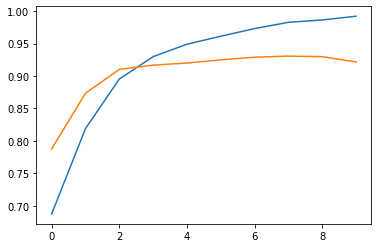

In [35]:
#plotting the loss and validation loss of the model
plt.plot(a.history["accuracy"],label="accuracy") 
plt.plot(a.history["val_accuracy"],label="val_accuracy") 

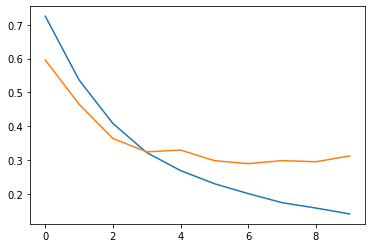

In [36]:
#plotting the loss and validation loss of the model
plt.plot(a.history["loss"],label="loss") 
plt.plot(a.history["val_loss"],label="val_loss") 

In [37]:
## Creating LSTM model
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(LSTM(128))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 294,849
Trainable params: 294,849
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
len(embedded_docs),y.shape

(18285, (18285,))

In [39]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [40]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [41]:
### Finally Training
b=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 12s 50ms/step - loss: 0.3023 - accuracy: 0.8602 - val_loss: 0.2042 - val_accuracy: 0.9170
Epoch 2/10
192/192 [==============================] - 9s 47ms/step - loss: 0.1362 - accuracy: 0.9450 - val_loss: 0.2164 - val_accuracy: 0.9167
Epoch 3/10
192/192 [==============================] - 9s 47ms/step - loss: 0.0940 - accuracy: 0.9669 - val_loss: 0.2289 - val_accuracy: 0.9052
Epoch 4/10
192/192 [==============================] - 9s 48ms/step - loss: 0.0590 - accuracy: 0.9807 - val_loss: 0.2753 - val_accuracy: 0.9127
Epoch 5/10
192/192 [==============================] - 9s 47ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.3347 - val_accuracy: 0.9084
Epoch 6/10
192/192 [==============================] - 9s 47ms/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.4093 - val_accuracy: 0.9085
Epoch 7/10
192/192 [==============================] - 9s 47ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.3840 - val_accuracy: 0.910

In [42]:
lstm_pred=(model2.predict(X_test)>0.5).astype("int32")

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lstm_pred)

array([[3104,  315],
       [ 265, 2351]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lstm_pred)

0.903893951946976

In [45]:
print(classification_report(y_test,lstm_pred,target_names=["real","fake"]))

              precision    recall  f1-score   support

        real       0.92      0.91      0.91      3419
        fake       0.88      0.90      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



In [46]:
b.history

{'accuracy': [0.8601632714271545,
  0.9449796080589294,
  0.9669387936592102,
  0.9807347059249878,
  0.9876734614372253,
  0.9932245016098022,
  0.9953469634056091,
  0.998285710811615,
  0.9978775382041931,
  0.9984489679336548],
 'loss': [0.30234894156455994,
  0.13618533313274384,
  0.09397964179515839,
  0.0590042881667614,
  0.0381980799138546,
  0.02346389926970005,
  0.01595977693796158,
  0.006365011911839247,
  0.00606430321931839,
  0.0042399074882268906],
 'val_accuracy': [0.9169842600822449,
  0.9166528582572937,
  0.905219554901123,
  0.9126760363578796,
  0.9083678722381592,
  0.9085335731506348,
  0.9101905822753906,
  0.9017398357391357,
  0.9075393676757812,
  0.9038939476013184],
 'val_loss': [0.20418471097946167,
  0.21643762290477753,
  0.22894710302352905,
  0.2753121554851532,
  0.3347208499908447,
  0.40926072001457214,
  0.3839859962463379,
  0.6793599724769592,
  0.6109855771064758,
  0.6995542645454407]}

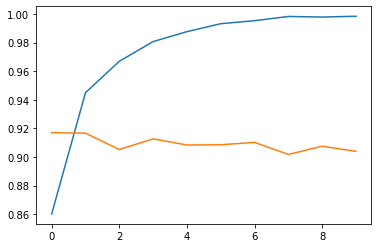

In [47]:
#plotting the loss and validation loss of the model
plt.plot(b.history["accuracy"],label="accuracy") 
plt.plot(b.history["val_accuracy"],label="val_accuracy") 

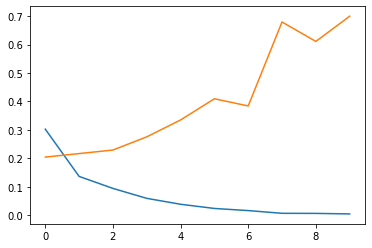

In [48]:
#plotting the loss and validation loss of the model
plt.plot(b.history["loss"],label="loss") 
plt.plot(b.history["val_loss"],label="val_loss") 

In [49]:
## Creating stacked_lstm model
embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add(LSTM(256,return_sequences=True))
model3.add(LSTM(128,return_sequences=True))
model3.add(LSTM(64))
model3.add(Dense(32,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 256)           304128    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 128)           197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [50]:
### Finally Training
c=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,batch_size=64)

Epoch 1/7
192/192 [==============================] - 46s 217ms/step - loss: 0.6377 - accuracy: 0.6405 - val_loss: 0.5574 - val_accuracy: 0.7190
Epoch 2/7
192/192 [==============================] - 41s 211ms/step - loss: 0.4644 - accuracy: 0.7732 - val_loss: 0.3372 - val_accuracy: 0.8499
Epoch 3/7
192/192 [==============================] - 41s 214ms/step - loss: 0.2789 - accuracy: 0.8813 - val_loss: 0.2501 - val_accuracy: 0.8936
Epoch 4/7
192/192 [==============================] - 42s 218ms/step - loss: 0.1981 - accuracy: 0.9224 - val_loss: 0.2222 - val_accuracy: 0.9090
Epoch 5/7
192/192 [==============================] - 41s 215ms/step - loss: 0.1643 - accuracy: 0.9377 - val_loss: 0.2249 - val_accuracy: 0.9044
Epoch 6/7
192/192 [==============================] - 42s 217ms/step - loss: 0.1335 - accuracy: 0.9517 - val_loss: 0.2259 - val_accuracy: 0.9085
Epoch 7/7
192/192 [==============================] - 41s 216ms/step - loss: 0.1163 - accuracy: 0.9586 - val_loss: 0.2312 - val_accuracy:

In [51]:
stack_pred=(model3.predict(X_test)>0.5).astype("int32")

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,stack_pred)

array([[3113,  306],
       [ 195, 2421]])

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,stack_pred)

0.9169842584921293

In [54]:
print(classification_report(y_test,stack_pred,target_names=["real","fake"]))

              precision    recall  f1-score   support

        real       0.94      0.91      0.93      3419
        fake       0.89      0.93      0.91      2616

    accuracy                           0.92      6035
   macro avg       0.91      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



In [55]:
c.history

{'accuracy': [0.6404898166656494,
  0.7732244729995728,
  0.8813061118125916,
  0.9223673343658447,
  0.9377142786979675,
  0.9516734480857849,
  0.9586122632026672],
 'loss': [0.63767409324646,
  0.46438807249069214,
  0.2788655757904053,
  0.1981385350227356,
  0.1642548143863678,
  0.13350403308868408,
  0.1162513867020607],
 'val_accuracy': [0.7189726829528809,
  0.8498757481575012,
  0.8936205506324768,
  0.9090306758880615,
  0.9043910503387451,
  0.9085335731506348,
  0.9169842600822449],
 'val_loss': [0.5574499368667603,
  0.3372235894203186,
  0.2501002252101898,
  0.22215844690799713,
  0.22486159205436707,
  0.225897416472435,
  0.23116280138492584]}

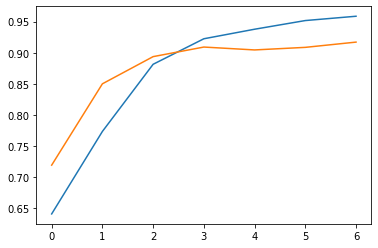

In [56]:
#plotting the loss and validation loss of the model
plt.plot(c.history["accuracy"],label="accuracy") 
plt.plot(c.history["val_accuracy"],label="val_accuracy") 

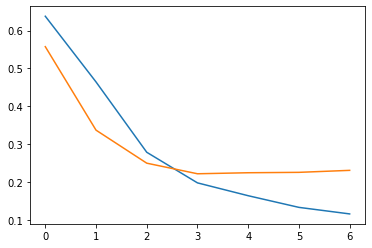

In [57]:
#plotting the loss and validation loss of the model
plt.plot(c.history["loss"],label="loss") 
plt.plot(c.history["val_loss"],label="val_loss") 

In [58]:
## Creating Bi-directional_lstm model
embedding_vector_features=40
model4=Sequential()
model4.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model4.add(Bidirectional (LSTM(128)))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(32,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               173056    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [59]:
### Finally Training
d=model4.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64)

Epoch 1/10
173/173 [==============================] - 17s 78ms/step - loss: 0.6167 - accuracy: 0.6899 - val_loss: 0.2883 - val_accuracy: 0.8743
Epoch 2/10
173/173 [==============================] - 13s 74ms/step - loss: 0.2408 - accuracy: 0.9047 - val_loss: 0.2129 - val_accuracy: 0.9078
Epoch 3/10
173/173 [==============================] - 13s 73ms/step - loss: 0.1771 - accuracy: 0.9320 - val_loss: 0.2137 - val_accuracy: 0.9110
Epoch 4/10
173/173 [==============================] - 13s 73ms/step - loss: 0.1469 - accuracy: 0.9470 - val_loss: 0.2097 - val_accuracy: 0.9151
Epoch 5/10
173/173 [==============================] - 13s 74ms/step - loss: 0.1161 - accuracy: 0.9601 - val_loss: 0.2463 - val_accuracy: 0.9094
Epoch 6/10
173/173 [==============================] - 13s 74ms/step - loss: 0.0928 - accuracy: 0.9715 - val_loss: 0.2698 - val_accuracy: 0.9102
Epoch 7/10
173/173 [==============================] - 13s 74ms/step - loss: 0.0736 - accuracy: 0.9800 - val_loss: 0.2726 - val_accuracy:

In [60]:
bi_pred=(model4.predict(X_test)>0.5).astype("int32")

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,bi_pred)

array([[3041,  378],
       [ 186, 2430]])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,bi_pred)

0.9065451532725767

In [63]:
print(classification_report(y_test,bi_pred,target_names=["real","fake"]))

              precision    recall  f1-score   support

        real       0.94      0.89      0.92      3419
        fake       0.87      0.93      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [64]:
d.history

{'accuracy': [0.6898866295814514,
  0.9046711921691895,
  0.9319728016853333,
  0.9470294713973999,
  0.960090696811676,
  0.9715192914009094,
  0.9799546599388123,
  0.9850339889526367,
  0.9876644015312195,
  0.9882993102073669],
 'loss': [0.616709291934967,
  0.24083153903484344,
  0.17710193991661072,
  0.14691369235515594,
  0.11607719957828522,
  0.09283380955457687,
  0.0735694169998169,
  0.059329863637685776,
  0.048845209181308746,
  0.04678577557206154],
 'val_accuracy': [0.8742856979370117,
  0.9077550768852234,
  0.9110203981399536,
  0.9151020646095276,
  0.9093877673149109,
  0.9102040529251099,
  0.9093877673149109,
  0.9061224460601807,
  0.9077550768852234,
  0.9126530885696411],
 'val_loss': [0.2882930338382721,
  0.21293553709983826,
  0.21372090280056,
  0.20970095694065094,
  0.24631576240062714,
  0.2697897255420685,
  0.272563636302948,
  0.2997415363788605,
  0.3677806258201599,
  0.327034592628479]}

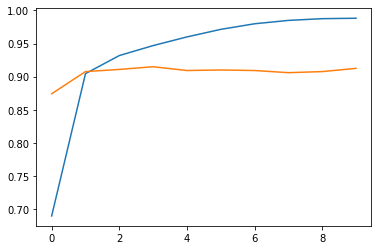

In [65]:
#plotting the loss and validation loss of the model
plt.plot(d.history["accuracy"],label="accuracy") 
plt.plot(d.history["val_accuracy"],label="val_accuracy") 

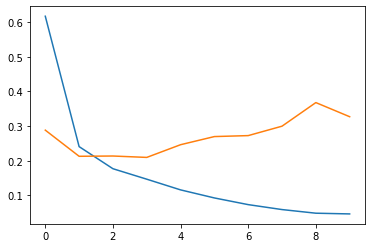

In [66]:
#plotting the loss and validation loss of the model
plt.plot(d.history["loss"],label="loss") 
plt.plot(d.history["val_loss"],label="val_loss") 

In [67]:
from sklearn.metrics import roc_curve

bi_fpr, bi_tpr, threshold = roc_curve(y_test, bi_pred)
rnn_fpr, rnn_tpr, threshold = roc_curve(y_test, rnn_pred)
lstm_fpr, lstm_tpr, thresold = roc_curve(y_test, lstm_pred)
st_fpr, st_tpr, threshold = roc_curve(y_test, stack_pred)

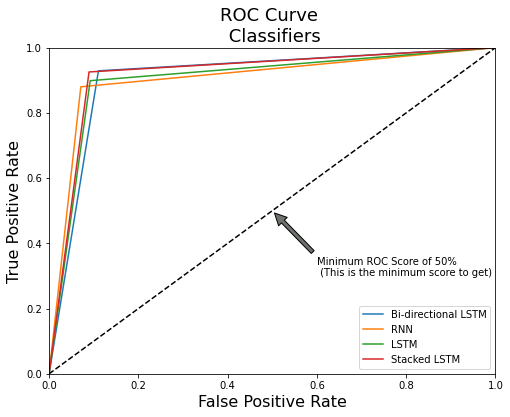

In [68]:
import matplotlib.pyplot as plt
def graph_roc_curve_multiple(bi_fpr, bi_tpr, rnn_fpr, rnn_tpr, lstm_fpr , lstm_tpr, st_fpr, st_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(bi_fpr, bi_tpr, label='Bi-directional LSTM')
    plt.plot(rnn_fpr, rnn_tpr, label='RNN')
    plt.plot(lstm_fpr , lstm_tpr, label='LSTM')
    plt.plot(st_fpr, st_tpr, label='Stacked LSTM')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(bi_fpr, bi_tpr, rnn_fpr, rnn_tpr, lstm_fpr, lstm_tpr, st_fpr, st_tpr)
plt.show()